In [101]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np




In [102]:
TRAIN_DIR ='C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train'

TEST_DIR = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\test'



In [103]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [104]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [105]:
print(train)


                                                   image     label
0      C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
1      C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
2      C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
3      C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
4      C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
...                                                  ...       ...
28816  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
28817  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
28818  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
28819  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
28820  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise

[28821 rows x 2 columns]


In [106]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [107]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
1     C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
2     C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
3     C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
4     C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...     angry
...                                                 ...       ...
7061  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
7062  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
7063  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
7064  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise
7065  C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...  surprise

[7066 rows x 2 columns]
0       C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...
1       C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...
2       C:\Users\DELL\OneDrive\Desktop\Emotion_detecti...
3       C

In [108]:
from tqdm.notebook import tqdm

In [109]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [110]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [111]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [112]:
x_train = train_features/255.0
x_test = test_features/255.0

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [115]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [116]:
import numpy as np

# Assuming y_train and y_test are your label arrays
num_classes = 7  # Number of classes

# Convert labels to integers if they are not already
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Convert labels to categorical one-hot encoding
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [117]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [118]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [119]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
  4/226 ━━━━━━━━━━━━━━━━━━━━ 6:20 2s/step - accuracy: 0.1605 - loss: 1.9488

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [120]:
from keras.models import model_from_json
from keras.models import load_model




In [121]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()

# Load the model from the saved file
model = load_model("facialemotionmodel.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [122]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [123]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [124]:
image = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\sad\\42.jpg'

print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
model prediction is  sad


In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  sad


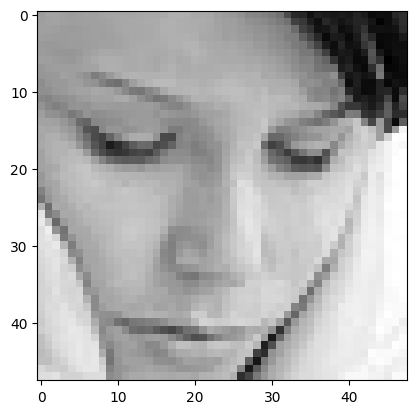

In [126]:
image = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\sad\\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
model prediction is  sad


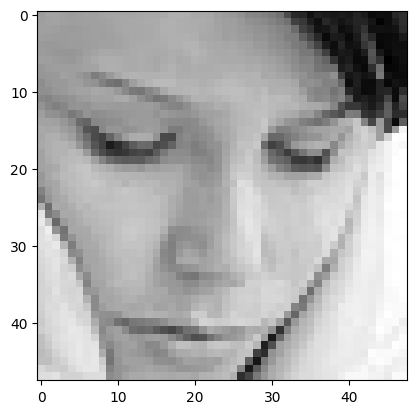

In [127]:
image = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\sad\\42.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
model prediction is  sad


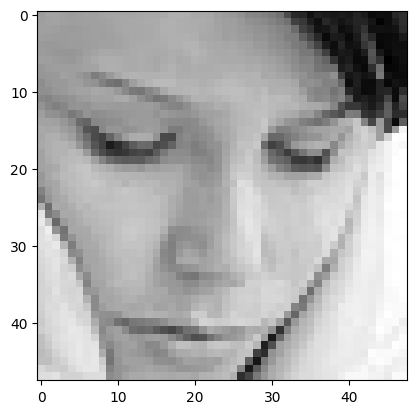

In [128]:
image = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\sad\\42.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
model prediction is  happy


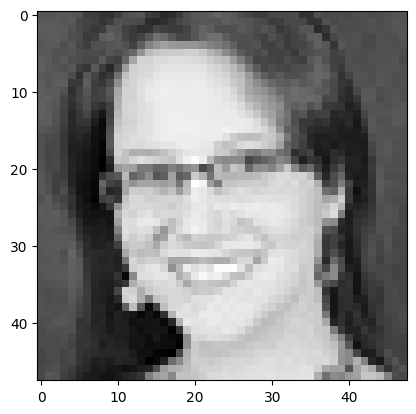

In [129]:
image='C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\happy\\7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
model prediction is  surprise


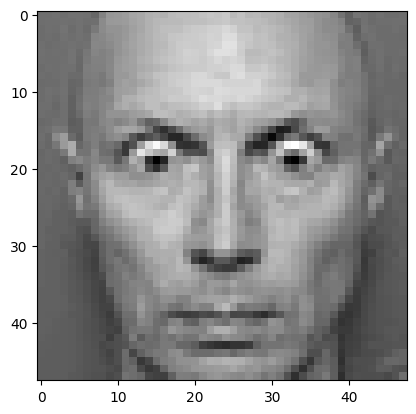

In [135]:
image = 'C:\\Users\\DELL\\OneDrive\\Desktop\\Emotion_detection\\Real_time_emotion\\archive (1)\\images\\train\\surprise\\15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')